- Introduction:
We use California Housing to predict median house value (target in $100k units).
- Goal:
Predict California median house value (MedHouseVal, in $100,000s) using census-based housing attributes such as:
MedInc — median income
HouseAge — median house age
AveRooms, AveBedrms — average rooms/bedrooms per household
Population, AveOccup — population and average occupancy
Latitude, Longitude — geographic coordinates
- Dataset:
We use the California Housing dataset from scikit-learn, which contains ~20,000 records of block-level housing data collected from the 1990 U.S. Census.
It’s a regression problem, where the target (MedHouseVal) is continuous.
- Workflow Outline:
Load and explore the dataset.
Split data into training and testing subsets (80/20).
Perform EDA (Exploratory Data Analysis) on the training set only.
Build a preprocessing + model pipeline with:
SimpleImputer → fill missing values
StandardScaler → normalize numeric features
LinearRegression → train a predictive model
- Evaluate performance using:
MAE (Mean Absolute Error)
RMSE (Root Mean Squared Error)
R² Score
- Diagnose residuals visually to check model fit.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing     
from sklearn.model_selection import train_test_split          
from sklearn.pipeline import Pipeline                         
from sklearn.impute import SimpleImputer                      
from sklearn.preprocessing import StandardScaler              
from sklearn.linear_model import LinearRegression             
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score  



In [2]:
# Load Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Shape:", df.shape)
print(df.head(3))


Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  


In [4]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


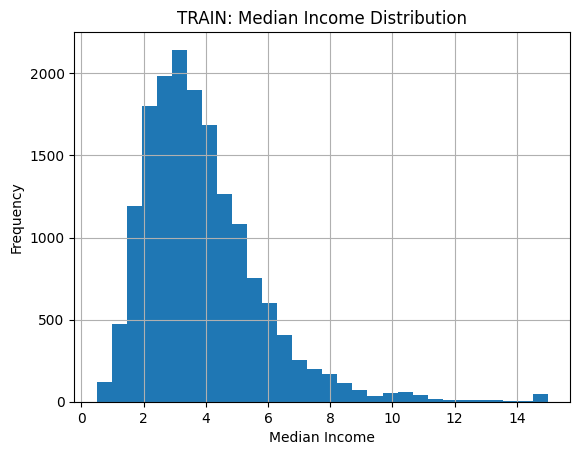

In [6]:
X_train['MedInc'].hist(bins=30)
plt.title('TRAIN: Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()


In [7]:
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [15]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)  
r2   = r2_score(y_test, y_pred)



print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R^2  : {r2:.4f}")


MAE  : 0.5332
RMSE : 0.7456
R^2  : 0.5758


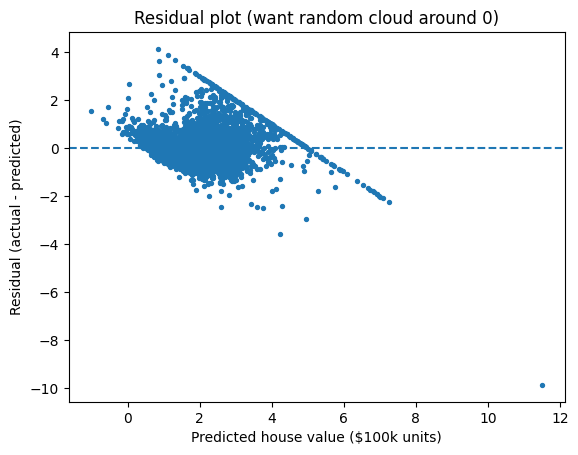

In [16]:
resid = y_test - y_pred
plt.scatter(y_pred, resid, s=8)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted house value ($100k units)')
plt.ylabel('Residual (actual - predicted)')
plt.title('Residual plot (want random cloud around 0)')
plt.show()

